# Análise de Sistemas em Tempo Contínuo com a Transformada de Laplace

A transformada de Laplace é uma ferramenta importante no estudo de sistemas lineares invariantes no tempo. É frequentemente utilizada ao resolver equações diferenciais ou sistemas de equações diferenciais,  determinar a estabilidade, controlabilidade e observabilidade de sistemas, etc.

## A Transformada de Laplace

Seja uma função $f(t)$. A Transformada de Fourier de $f(t)$ descreve o conteúdo espectral no domínio da frequência e é dada por

$$F(j\omega)=\mathscr{F}(f(t))=\int_{-\infty}^{\infty}f(t)e^{-j\omega t}\,dt$$

$s=\sigma +j\omega$ é a frequência complexa. vamos definir $f_s(t)$ como

$$f_s(t)=e^{-\sigma t}f(t)$$

e portanto

$$\mathscr{F}(f_s(t))=\int_{-\infty}^{\infty}f(t)e^{-\sigma t}e^{-j\omega t}\,dt=\int_{-\infty}^{\infty}f(t)e^{-st}\,dt.$$


A ultima integral acima à direita é a transformada de Laplace  de $f(t)$, escrita como

\begin{equation*}
F(s)=\mathcal{L}(f(t))=\int_{-\infty}^{\infty}f(t)e^{-st}\,dt.
\label{} \tag{1}
\end{equation*}

Por outro lado, a transformada de Fourier inversa de $f_s(t)$ é

$$f_s(t)=e^{-\sigma t}f(t)=\frac{1}{2\pi}\int_{-\infty}^{\infty}F(s)e^{j\omega t}\,d\omega.$$

Como $ds=jd\omega\,(\sigma\, \mbox{é constante})$, da última igualdade acima escrevemos a Transformada Inversa de Laplace como

\begin{equation*}
f(t)=\mathcal{L}^{-1}(F(s))=\frac{1}{j2\pi}\int_{\sigma-j\infty}^{\sigma+j\infty}F(s)e^{st}\,ds.
\label{}\tag{2}
\end{equation*}

A equação (1) é a transformada de Laplace bilateral. Para sistemas causais, $f(t)=0\;\mbox{para}\;t< 0$, daí o limite inferior agora é $^-$, e portanto, 

\begin{equation*}
F(s)=\mathcal{L}(f(t))=\int_{0^-}^{\infty}f(t)e^{-st}\,dt
\label{}\tag{3}
\end{equation*}

a qual é a transformada de Laplace unilateral.

**Exemplo** Seja $f(t)=\delta(t)$. A transformada do impulso é

$$\int_{0^-}^{\infty} \delta(t) e^{-st}\,dt= 1$$

usando a priopriedade da amostragem do impulso. Portanto, temos o par de transformadas

$$ \delta(t) \Leftrightarrow 1.$$

**Exemplo** Transformadas de outras funções básicas.
Usaremos agora a biblioteca simbólica SymPy para fazer uma tabela de transformadas básicas: inicialmente definimos um lista básica de funções. 

In [1]:
import sympy as sp
sp.init_printing()

t, s = sp.symbols('t, s')
omega = sp.Symbol('omega', real=True)
a = sp.symbols('a', real=True, positive=True)
exp = sp.exp
sin = sp.sin
cos = sp.cos
functions = [1,
         t,
         exp(-a*t),
         t*exp(-a*t),
         t**2*exp(-a*t),
         sin(omega*t),
         cos(omega*t),
         1 - exp(-a*t),
         ]
functions

Em seguida definimos uma função para determinação da lista de transformadas, usando a função laplace_transform(f, t, s, noconds=True). "noconds=True" diz à rotina que queremos apenas a transformada, sem condições de convergência.

In [2]:
def L(f):
    return sp.laplace_transform(f, t, s, noconds=True)

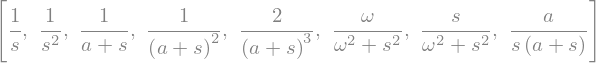

In [3]:
Fs = [L(f) for f in functions]
Fs

In [4]:
from pandas import DataFrame

In [5]:
def makelatex(args):
    return ["$${}$$".format(sp.latex(a)) for a in args]

In [6]:
DataFrame(list(zip(makelatex(functions), makelatex(Fs))))

,0,1
0,$$1$$,$$\frac{1}{s}$$
1,$$t$$,$$\frac{1}{s^{2}}$$
2,$$e^{- a t}$$,$$\frac{1}{a + s}$$
3,$$t e^{- a t}$$,$$\frac{1}{\left(a + s\right)^{2}}$$
4,$$t^{2} e^{- a t}$$,$$\frac{2}{\left(a + s\right)^{3}}$$
5,$$\sin{\left(\omega t \right)}$$,$$\frac{\omega}{\omega^{2} + s^{2}}$$
6,$$\cos{\left(\omega t \right)}$$,$$\frac{s}{\omega^{2} + s^{2}}$$
7,$$1 - e^{- a t}$$,$$\frac{a}{s \left(a + s\right)}$$


### A transformada da derivada

$$\mathcal{L}(f'(t) u(t))=\int_{0^-}^{\infty}f'(t)e^{-st}\,dt$$

Integrando por partes, temos

$$\mathcal{L}(f'(t) u(t))=f(t)e^{-st}\bigg\|_{0^-}^{\infty}+\int_{0^-}^{\infty} f(t)e^{-st}\,dt$$

O primeiro termo do lado direito é $-f(0^-)$, e a integral é simplesmente a transformada de $f(t)$, ou seja, $F(s)$, e portanto

$$\mathcal{L}(f'(t) u(t))= sF(s)-f(0^-)$$

analogamente, 

$$\mathcal{L}(f''(t) u(t))= s^2F(s)-sf(0^-)-f'(0^-)$$

e

$$\mathcal{L}(f'''(t) u(t))=s^3F(s)-s^2f(0^-)-sf'(0^-)-f''(0^-)$$

e assim, sucessivamente. 

### A transformada de uma integral

$$\mathcal{L}\left(\left\{\int_{0^-}^{t} f(\tau)\,d\tau u(t)\right\}\right)=\int_{0^-}^{\infty} \left(\int f(\tau)\,d\tau\right) e^{-st} \,dt$$

novamente, integrando por partes,


$$\mathcal{L}\left(\left\{\int_{0^-}^{t} f(\tau)\,d\tau u(t)\right\}\right)=\frac{-1}{s}\int_{0^-}^tf(\tau)\,d\tau\,e^{-st} \bigg|_{0^-}^\infty +\frac{1}{s}\int_{0^-}^{\infty}f(t)e^{-st}\,dt$$

O primeiro termo do lado direito é nulo, enquanto a integral é a transformada de Laplace de $f(t)$, portanto

$$\mathcal{L}\left(\left\{\int_{0^-}^{t} f(\tau)\,d\tau u(t)\right\}\right)=\frac{F(s)}{s}$$


### A transformada inversa: expansão em frações parciais

A transformada inversa formal é obtida através da integral (2), a qual é realizada no plano complexo. Para se obter uma solução de forma mais direta, podemos usar nosso conhecimento dos pares de transformadas como os vistos acima. Entretanto, frequentemente a transformada é uma função racional $F(s)=\frac{P(s)}{Q(s}$, onde $P(s)$ e $Q(s)$ são polinomios de $s$. As raízes de $P(s)$ são denominadas de zeros de $F(s)$ e as de $Q(s)$ são os polos de $F(s)$. Neste caso, a expansão em frações parciais leva à decomposição de $F(s)$ em termos mais simples, com fácil identificação de seus pares transformados. Dois casos são considerados:

**a) polos distintos.**

Seja $F(s)=\frac{7s-6}{s^2-s-6}=\frac{7s-6}{(s-2)(s+3)}$. Podemos expandir $F(s)$ como 

$$F(s)=\frac{7s-6}{(s-2)(s+3)}=\frac{A_1}{s-2}+\frac{A_2}{s+3}.$$

Para encontrar $A_1$, simplesmente multiplicamos a equação acima por $s-2$, e depois fazemos $s=2$ na equação resultante, isso é

$$(s-2)F(s)=\frac{7s-6}{s+3}=A_1+A_2\frac{s-2}{s+3}$$

$$A_1=\frac{7s-6}{s+3}\bigg\|_{s=2}=\frac{8}{5}$$

Analogamente, para $A_2$ temos

$$A_2=(s+3)F(s)=\frac{7s-6}{s-2}\bigg\|_{s=-3}=\frac{27}{5}.$$

Portanto, $F(s)=\frac{8}{5(s-2)}+\frac{27}{5(s+3)}$, e daí, consultando os pares de transformada podemos encontrar $f(t)$:

$$f(t)=\left(\frac{8}{5}e^{2t}+\frac{27}{5}e^{-3t}\right)u(t).$$

**b)polos repetidos**

seja agora $F(s)=\frac{3s-1}{s(s-1)^3}$. Como antes expandimos em frações parciais como segue:

\begin{equation*}
F(s)=\frac{3s-1}{s(s-1)^3}=\frac{A_1}{s}+\frac{B_1}{(s-1)^3}+\frac{B_2}{(s-2)^2}+\frac{B_3}{s-1}.
\label{}\tag{4}
\end{equation*}

para encontrar $A_1$, fazemos com o anteriormente, isto é:

$$A_1=sF(s)=\frac{3s-1}{(s-1)^3}\bigg\|_{s=0}=1.$$

Já para determinação dos $B_i$s, começamos por multiplicar a equação (4) por $(s-1)^3$

\begin{equation*}
\frac{3s-1}{s}=(s-1)^3\frac{A_1}{s}+B_1+B_2(s-1)+B_3(s-1)^2,
\label{}\tag{5}
\end{equation*}

e $B_1$  é obtido como:

$$B_1=\frac{3s-1}{s}\bigg\|_{s=1}=2.$$

Para determinação de $B_2$, diferenciamos (5) em função de *s*, 

\begin{equation*}
\frac{d}{ds}\left(\frac{3s-1}{s}\right)=\frac{1}{s^2}=B_2+2(s-1)B_3+\frac{d}{ds}\left((s-1)^3\frac{A_1}{s}\right),
\tag{6}
\end{equation*}

de onde obtemos $B_2$  como

$$B_2=\frac{1}{s^2}\bigg\|_{s=1}=1.$$

Finalmente, diferenciamos novamente (6) para encontrar $B_3$.

$$\frac{d}{ds}\left(\frac{1}{s^2}\right)=\frac{-2}{s^3}\bigg\|_{s=1}=-1,$$

$$F(s)=\frac{1}{s}+\frac{2}{(s-1)^3}+\frac{1}{(s-1)^2}-\frac{1}{s-1}.$$

Com os pares 0,2,3 e 4 da tabela, encontramos $f(t)$:

$$f(t)=(1+t^2e^{t}+te^{t}+e^t)u(t)$$


### Propriedade do deslocamento no tempo:

Considere o para transformado $f(t) \rightarrow F(s) $. A transformada de $f(t-t_0)$ é encontrada por simples substituição $t'=t-t_0$:

$$\mathcal{L}(f(t-t_0))=\int_{0^-}^{\infty}f(t-t_0)e^{-st}\,dt=\int_{0^-}^{\infty}f(t')e^{-s(t'+t_0)}\,dt'=e^{-st_o}\int_{0^-}^{\infty}f(t')e^{-st'}\,dt'=e^{-st_0}F(s).$$

### Propriedade do deslocamento na frequência:

para uma dada função $f(t)$ com transformada $F(s)$, a transformada de $e^{at}f(t)$ é

$$\mathcal{L}(e^{at}F(s))=\int_{0^-}^{\infty}f(t)e^{at}e^{-st}\,dt=\int_{0^-}^{\infty}f(t)e^{-(s-a)t}\,dt=F(s-a)$$









### Aplicação à Análise de Sistemas

**Exemplo** Seja o sistema representado pela equação $(D^2+5D+6)y(t)=(D+1)x(t)$, com as condições iniciais $y(0^-)=2$ e $y'(0^-)=1$, alimentado pela entrada $x(t)=e^{-4t}u(t)$.

Iniciamos fazendo a transformada da equação diferencial usando a propriedade da transformada das derivadas, e inserido as condições iniciais, isto é:

$$s^2Y(s)-sy(0^-)-y'(0^-)+5sY(s)-5y(0^-)+6Y(s)=(s+1)X(s),$$

onde $Y(s)=\mathcal{L}(y(t))$ e $\mathcal{L}(x(t))=X(s)=\frac{1}{s+4)}$. Assim, 

$$(s^2+5s+6)Y(s)=(s+1)X(s)+2s+11$$

podemos escrever a equação acima como

$$Q(s)Y(s)=P(s)X(s)+2s+11.$$

E a resposta no domínio de Laplace, $Y(s)$, é dada por

$$Y(s)=\frac{P(s)}{Q(s)}X(s)+\frac{2s+11}{P(s)}.$$

$2s+11$ é o termo devido às condições iniciais, portanto, o primeiro termo do lado direito da equação acima, é a resposta de estado nulo do sistema, enquanto que o segundo termo é a resposta de entrada nula. A transformada inversa leva a resposta no domínio do tempo. 

Voltando ao exemplo, $Q(s)=(s+2)(s+3)$, substituindo na equação acima resulta em


$$Y(s)=\frac{s+1}{(s+2)(s+3)}\frac{1}{(s+4)}+\frac{2s+11}{(s+2)(s+3)},$$

$$Y(s)=\frac{2s^2+20s+45}{(s+2)(s+3)(s+4)}=\frac{A_1}{s+2}+\frac{A_2}{s+3}+\frac{A_3}{s+4},$$

de onde determinamos que $A_1=\frac{13}{2}$, $A_2=-3$ e $A_3=\frac{-3}{2}$. A resposta no domínio de Laplace é

$$Y(s)=\frac{13}{2}\frac{1}{s+2}+\frac{-3}{s+3}+\frac{-3}{2}\frac{1}{s+4}.$$

A respopsta no domínio do tempo é encontrada com as transformadas inversas dos termos do lado direito.

$$y(t)=\left(\frac{13}{2}e^{-2t}-3e^{-3t}-\frac{-3}{2}e^{-4t}\right)u(t).$$





